In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Data verzamelen

In [3]:
# Load the data
data = pd.read_csv('../eigen/Iris_with_outliers.csv')

# Species omzetten naar 1-3
data['Species'] = data['Species'].replace('Iris-setosa', 1)
data['Species'] = data['Species'].replace('Iris-versicolor', 2)
data['Species'] = data['Species'].replace('Iris-virginica', 3)

display(data.head())

/tmp/ipykernel_40649/1517777661.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace('Iris-virginica', 3)


,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,0,5.1,3.5,1.4,0.2,1
1,1,1,4.7,3.2,1.6,0.2,1
2,2,2,4.9,3.1,1.5,0.1,1
3,3,3,4.4,2.9,1.4,0.2,1
4,4,4,5.0,3.4,1.5,0.2,1


# Data visualisatie

Unnamed: 0       86.000000
Id               86.000000
SepalLengthCm     5.834118
SepalWidthCm      3.068605
PetalLengthCm     3.718935
PetalWidthCm      1.171345
Species           1.976879
dtype: float64
     Unnamed: 0   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
20           20   20            5.8           4.0            1.2   
32           32   32            5.2           4.1            1.5   
33           33   33            5.5           4.2            1.4   
56           56   56            5.7           4.4            1.5   
90           90   90            5.0           2.0            3.5   
91           91   91            5.7           4.4            1.5   
115         115  115            8.0           2.9            4.3   
121         121  121            7.6           3.0            6.6   
125         125  125            7.7           3.8            6.7   
136         136  136            7.7           2.8            6.7   
140         140  140            7.7           2.

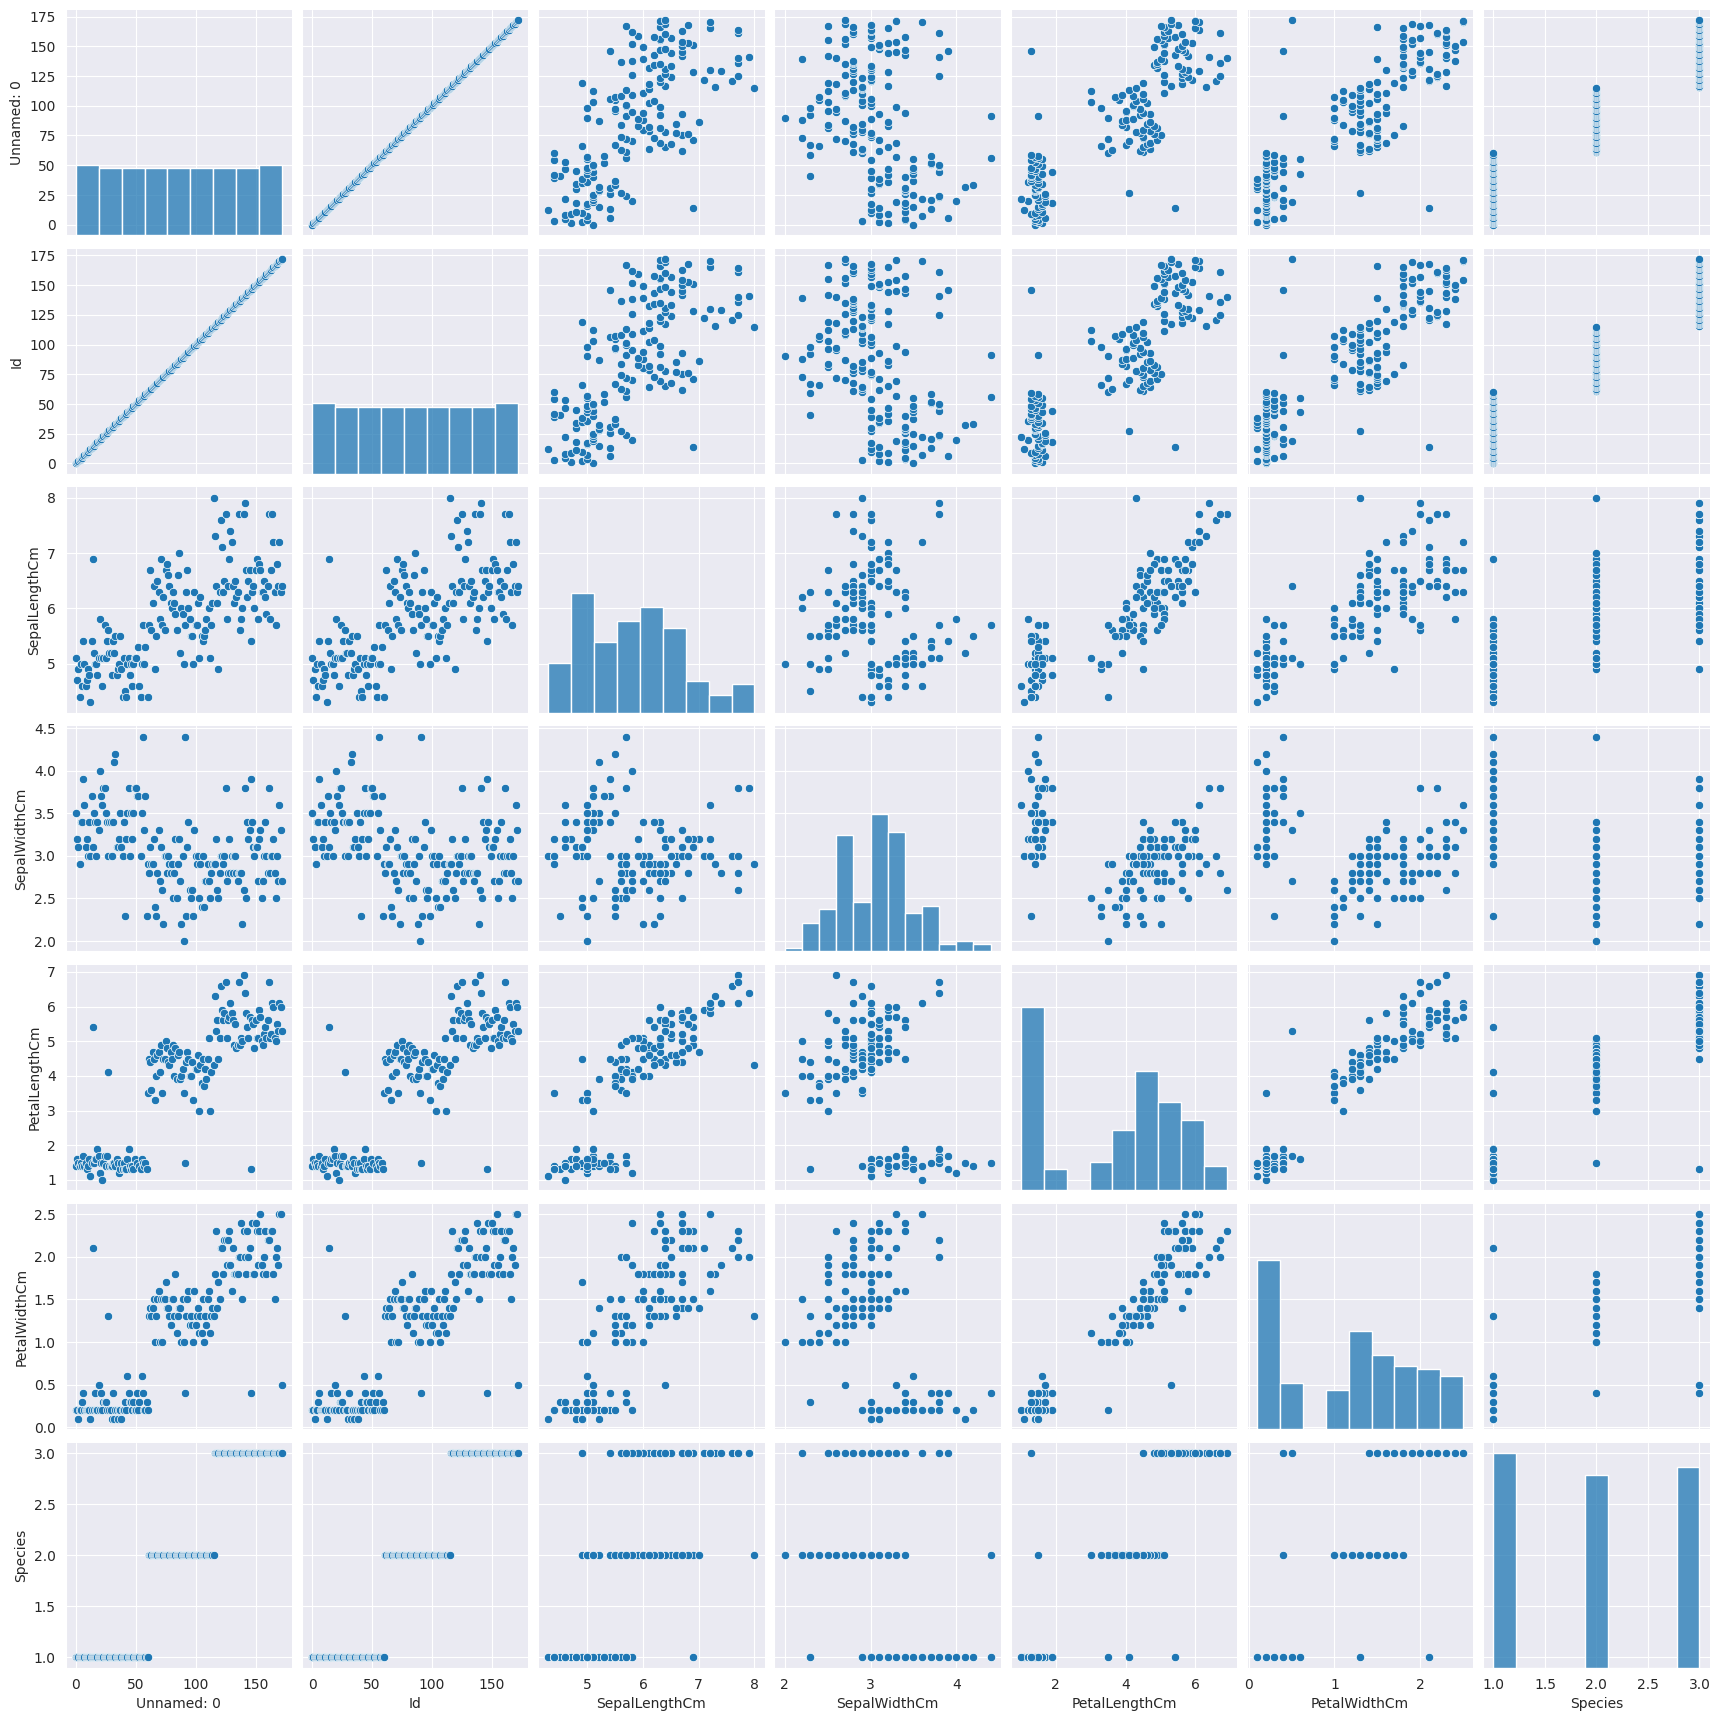

In [4]:
# Calculate means, Standarddeviations and outliers
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(means)
print(outliers)
print(stds)

# Visualize the dataset
sns.pairplot(data)
plt.show()

# Data opschonen en voorbereiden

In [5]:
# Search NaN and 0 values
print(data.isnull().sum())
print((data == 0).sum())

# Replace NaN and 0 values
data = data.replace(0, np.nan)
data = data.fillna(data.mean())

# Remove the unnamed and ID columns
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('Id', axis=1)

# Find outliers and remove them
means = data.mean()
stds = data.std()
outliers = data[(np.abs(data - means) > 2*stds).any(axis=1)]
print(outliers)
data = data.drop(outliers.index)

Unnamed: 0       0
Id               0
SepalLengthCm    3
SepalWidthCm     1
PetalLengthCm    4
PetalWidthCm     2
Species          0
dtype: int64
Unnamed: 0       1
Id               1
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
20             5.8           4.0            1.2           0.2        1
32             5.2           4.1            1.5           0.1        1
33             5.5           4.2            1.4           0.2        1
56             5.7           4.4            1.5           0.4        1
90             5.0           2.0            3.5           1.0        2
91             5.7           4.4            1.5           0.4        2
115            8.0           2.9            4.3           1.3        2
121            7.6           3.0            6.6           2.1        3
125            7.7           3.8            6.7           2.2        

### Data voorbereiden voor een eerlijke vergelijking

In [6]:
# Data omzetten naar species
data['Species'] = data['Species'].replace('Iris-setosa', 1)
data['Species'] = data['Species'].replace('Iris-versicolor', 2)
data['Species'] = data['Species'].replace('Iris-virginica', 3)


In [7]:
display(data.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.7,3.2,1.6,0.2,1
2,4.9,3.1,1.5,0.1,1
3,4.4,2.9,1.4,0.2,1
4,5.0,3.4,1.5,0.2,1


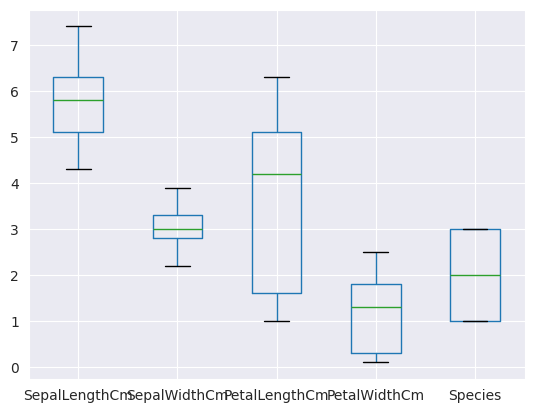

In [8]:
data.boxplot()
plt.show()

In [9]:
# Normalize the data (excluding the target 'PetalLenghtCm')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('PetalLengthCm', axis=1))

# Data spliten, testen en trainen

In [12]:
# Split the data
y = data['Species'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


## Data voorspellen en evalueren

In [14]:
# Voorspellen
y_pred = model.predict(X_test)

# Evalueren
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0 10]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



## Heatmap van de confusion matrix

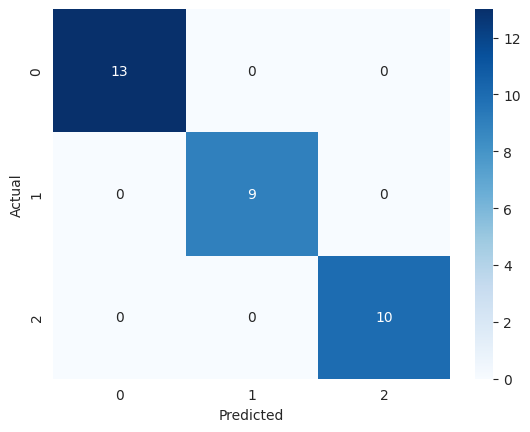

In [15]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()